In [2]:
import pandas as pd

df = pd.read_csv('Championnat-2023.csv', sep=';', header=0)

results = {x: df.iloc[y].to_list() for y, x in enumerate(df['Nom'])}
results_10, record_2023 = {},{}

for key in results:
    
    results_10[key] = results[key][1:11]
    record_2023[key] = results[key][11:12]
    
record_2023 = {key: int(46 - value[0]) for key, value in record_2023.items()}

print(results_10)
print(record_2023)

{'Yannick': [10, 4, -1, 5, -1, 12, 7, 8, 12, 7], 'LaurentM': [7, 9, 8, 8, 9, 7, 9, 3, 0, 0], 'Jody': [10, 10, 11, 9, 7, 9, 5, 8, 11, 0], 'David': [3, 1, 5, 11, 5, 11, 1, -3, 9, 0], 'Jacques': [5, 7, 4, 3, 5, 2, 7, 10, 0, 0], 'Serge': [10, 4, 6, 7, 6, 9, 11, 4, 2, 0], 'Bruno': [3, 6, 3, 4, 9, 2, 8, 7, 4, 0], 'Thao': [8, 10, 1, 8, 0, 0, 0, 0, 0, 0], 'M-C': [4, -1, 5, 7, 4, 1, 9, -3, 9, 0], 'Manu': [-2, 0, 0, 8, 8, 4, 5, 5, 0, 0], 'Yves': [8, -4, -3, -3, 6, 3, 7, 3, 0, 0], 'Caroline': [3, 7, 0, 4, 2, 0, 2, 0, 0, 0], 'Pascal': [4, 7, -1, 6, 6, 11, 6, 0, 0, 0], 'Jay': [6, 2, 6, 7, 5, 2, 0, 0, 0, 0], 'Daniel': [1, -2, 7, -3, 1, -2, 2, 8, -1, -1]}
{'Yannick': 31, 'LaurentM': 37, 'Jody': 33, 'David': 32, 'Jacques': 34, 'Serge': 35, 'Bruno': 35, 'Thao': 33, 'M-C': 33, 'Manu': 33, 'Yves': 35, 'Caroline': 39, 'Pascal': 35, 'Jay': 37, 'Daniel': 36}


In [19]:
import numpy as np
import pandas as pd

name, sum_values, mean_values, std_values = [], [], [], []

for key, values in results_10.items():
    
    name.append(key)
    sum_values.append(np.sum(values))
    mean_values.append(np.mean(46 - np.array(values)))
    std_values.append(np.std(46 - np.array(values)))

record_list = list(record_2023.values())

df_results_2023 = pd.concat([pd.DataFrame(name, columns=['Nom']),
                             pd.DataFrame(sum_values, columns=['Total']),
                             pd.DataFrame(mean_values, columns=['Moyenne']),
                             pd.DataFrame(std_values, columns=['Ecart-type']),
                             pd.DataFrame(record_list, columns=['Record'])
                            ],axis=1)

df_results_2023 = df_results_2023.sort_values(['Total','Record'], ascending=[False,True], ignore_index=True)
print(df_results_2023)

         Nom  Total  Moyenne  Ecart-type  Record
0       Jody     80     38.0    3.193744      33
1    Yannick     63     39.7    4.428318      31
2   LaurentM     60     40.0    3.435113      37
3      Serge     59     40.1    3.330165      35
4      Bruno     46     41.4    2.690725      35
5      David     43     41.7    4.561798      32
6    Jacques     43     41.7    3.034798      34
7     Pascal     39     42.1    3.780212      35
8        M-C     35     42.5    3.956008      33
9       Manu     28     43.2    3.458323      33
10       Jay     28     43.2    2.749545      37
11      Thao     27     43.3    3.950949      33
12  Caroline     18     44.2    2.227106      39
13      Yves     17     44.3    4.148494      35
14    Daniel     10     45.0    3.577709      36


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('Championnat-2023.csv',sep=';',header=0)
df

,Nom,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,Total
0,Yannick,10,4,-1,5,-1,12,7,8,12,7,15,63
1,LaurentM,7,9,8,8,9,7,9,3,0,0,9,48
2,Jody,10,10,11,9,7,9,5,8,11,0,13,61
3,David,3,1,5,11,5,11,1,-3,9,0,14,43
4,Jacques,5,7,4,3,5,2,7,10,0,0,12,43
5,Serge,10,4,6,7,6,9,11,4,2,0,11,42
6,Bruno,3,6,3,4,9,2,8,7,4,0,11,46
7,Thao,8,10,1,8,0,0,0,0,0,0,13,26
8,M-C,4,-1,5,7,4,1,9,-3,9,0,13,26
9,Manu,-2,0,0,8,8,4,5,5,0,0,13,28


In [5]:
df_long = pd.melt(df, id_vars =['Nom'], value_vars =df.loc[:,'C1':'C11'],var_name='C', value_name='score')
df_max = df_long.query('C == "C11"')
df_max['score'] = 46 - df_max['score']
df_max = df_max.sort_values(['score','Nom'])
#print(df_max)

df_scores = df_long.query('C != "C11"')
df_scores = df_scores.groupby('Nom')['score'].sum()
#df_scores = df_scores.sort_values(df_scores[1])
#print(df_scores)

df_resume = pd.merge(left=df_max,right=df_scores, on=['Nom'])
df_resume = df_resume.sort_values(['score_y','Nom'], ascending=False, ignore_index=True)
print(df_resume)

df_long['score'] = 46 - df_long['score']
df_long
#f_long.describe()

         Nom    C  score_x  score_y
0       Jody  C11       33       80
1    Yannick  C11       31       63
2   LaurentM  C11       37       60
3      Serge  C11       35       59
4      Bruno  C11       35       46
5    Jacques  C11       34       43
6      David  C11       32       43
7     Pascal  C11       35       39
8        M-C  C11       33       35
9       Manu  C11       33       28
10       Jay  C11       37       28
11      Thao  C11       33       27
12  Caroline  C11       39       18
13      Yves  C11       35       17
14    Daniel  C11       36       10


,Nom,C,score
0,Yannick,C1,36
1,LaurentM,C1,39
2,Jody,C1,36
3,David,C1,43
4,Jacques,C1,41
...,...,...,...
160,Yves,C11,35
161,Caroline,C11,39
162,Pascal,C11,35
163,Jay,C11,37


## Histogrammes

In [6]:
import plotly.express as px
import plotly.figure_factory as ff

def histo(data): 
    
    scores = data['score'].value_counts().sort_index()
    scores_temp = scores[scores.index != 46]
    #print(scores_temp.values.tolist())
    fig = px.bar(scores_temp , x=scores_temp.index, y=scores_temp, template="simple_white", title=data['Nom'].iloc[0])
    fig.update_xaxes(nticks=18,dtick=1)
    fig.update_yaxes(dtick=1)
    fig.show()
    #fig2 = ff.create_distplot([scores_temp.index.tolist()], ['values'])
    #fig2.show()

#histogramme avec tous les joueurs
df_total = df_long
#df_total['Nom'] = 'Total'
histo(df_total)

#histogrammes par joueur
noms = df['Nom']
joueurs = pd.DataFrame(noms)
df_means = pd.DataFrame()

for joueur in joueurs['Nom']:
    
    df_long_joueur = df_long[(df_long['Nom'] == joueur) & (df_long['score'] != 46)]
    df_mean_joueur = pd.DataFrame()
    df_mean_joueur['mean'] = df_long_joueur.mean()
    df_mean_joueur['var'] = df_long_joueur.var()
    df_mean_joueur['std'] = df_long_joueur.std()
    df_mean_joueur['joueur'] = joueur
    df_means = df_means.append(df_mean_joueur, ignore_index=True)

    #histo(df_long_joueur)
df_means = df_means.sort_values('mean').reset_index()
print(df_means)
df_means.to_csv('results-stats.csv', encoding='utf-8')

#fig2 = px.histogram(df_total, x="score")

df_total = df_total[df_total['score'] != 46]
fig2 = ff.create_distplot([df_total['score']], ['total'])
fig2.update_xaxes(nticks=18,dtick=1)
fig2.update_yaxes(dtick=1)
fig2.show()


fig3 = px.box(df_long.query('score != 46'), x="Nom", y="score", notched=True)
fig3.show()

fig4 = px.strip(df_long.query('score != 46'), x="Nom", y="score")
fig4.show()


    index       mean        var       std    joueur
0       2  36.700000   5.122222  2.263233      Jody
1       7  38.000000  19.500000  4.415880      Thao
2       1  38.333333   3.750000  1.936492  LaurentM
3       0  38.909091  26.490909  5.146932   Yannick
4       5  39.000000  10.000000  3.162278     Serge
5      12  39.750000  14.785714  3.845220    Pascal
6       4  39.888889  10.611111  3.257470   Jacques
7       9  40.142857  21.142857  4.598136      Manu
8       3  40.300000  29.344444  5.417051     David
9       6  40.300000   8.900000  2.983287     Bruno
10     13  40.714286   6.571429  2.563480       Jay
11      8  41.200000  24.177778  4.917090       M-C
12     11  41.833333   5.366667  2.316607  Caroline
13     10  42.888889  29.361111  5.418589      Yves
14     14  44.181818  20.163636  4.490394    Daniel


In [7]:
import numpy as np
import pandas as pd

simulate = []
n = 100

freq = np.zeros((len(df_means), len(df_means)))  # Initialize freq as a numpy array

for index, row in df_means.iterrows():
    R = np.random.normal(row["mean"], row["std"], (1,n))
    simulate.append(R)
    
for i in range(len(df_means)):
    for j in range(len(df_means)):
        results = (simulate[i] < simulate[j])
        freq[i,j] = round((np.count_nonzero(results))/n*100,2)
    
#print(freq)
#print(type(freq))

df_results = pd.DataFrame(freq, columns = df_means['joueur'], index = df_means['joueur'] )
print(df_results)
#df_results.to_csv('results.csv', encoding='utf-8')

joueur    Jody  Thao  LaurentM  Yannick  ...   M-C  Caroline  Yves  Daniel
joueur                                   ...                              
Jody       0.0  57.0      69.0     66.0  ...  76.0      91.0  84.0    93.0
Thao      43.0   0.0      57.0     58.0  ...  72.0      79.0  77.0    83.0
LaurentM  31.0  43.0       0.0     59.0  ...  69.0      86.0  82.0    85.0
Yannick   34.0  42.0      41.0      0.0  ...  60.0      66.0  70.0    71.0
Serge     34.0  42.0      53.0     59.0  ...  70.0      84.0  76.0    81.0
Pascal    21.0  31.0      35.0     50.0  ...  59.0      66.0  67.0    75.0
Jacques   22.0  34.0      31.0     47.0  ...  63.0      78.0  71.0    80.0
Manu      27.0  32.0      34.0     44.0  ...  56.0      60.0  64.0    65.0
David     31.0  33.0      37.0     42.0  ...  56.0      58.0  65.0    68.0
Bruno     19.0  31.0      29.0     47.0  ...  56.0      61.0  65.0    74.0
Jay       15.0  25.0      24.0     40.0  ...  60.0      61.0  64.0    71.0
M-C       24.0  28.0     

In [8]:
import numpy as np
import pandas as pd

def simulation(k,n):
    
    simulate = []
    
    freq = np.zeros((len(df_means), len(df_means)))  # Initialize freq as a numpy array

    for index, row in df_means.iterrows():
        R = np.random.normal(row["mean"], row["std"], (k,n))
        #R = np.round(R)
        simulate.append(R)
    #print(simulate)  

    for i in range(len(df_means)):
        for j in range(len(df_means)):
            results = (simulate[i] < simulate[j])
            freq[i,j] = round((np.count_nonzero(results))/(k*n)*100,2)
    
    return freq

simulation_matrix = np.zeros((len(df_means),len(df_means)))
rep = 1000
for s in range(rep):
    simulation_matrix = simulation_matrix + simulation(1,1)
    simulation_matrix_mean = simulation_matrix / rep
    
simulation_final = np.round(simulation_matrix_mean)
print(simulation_final) 
    
df_results = pd.DataFrame(simulation_final, columns = df_means['joueur'], index = df_means['joueur'] )
print(df_results)
#df_results.to_csv('results.csv', encoding='utf-8')

[[ 0. 56. 71. 62. 75. 74. 77. 71. 74. 85. 87. 76. 94. 86. 93.]
 [44.  0. 55. 56. 63. 63. 66. 62. 66. 72. 73. 70. 82. 79. 85.]
 [29. 45.  0. 52. 60. 62. 65. 62. 64. 73. 78. 70. 89. 79. 88.]
 [38. 44. 48.  0. 54. 57. 57. 56. 59. 62. 66. 63. 72. 71. 78.]
 [25. 37. 40. 46.  0. 54. 56. 52. 60. 62. 67. 62. 77. 72. 83.]
 [26. 37. 38. 43. 46.  0. 51. 50. 55. 56. 60. 57. 71. 70. 78.]
 [23. 34. 35. 43. 44. 49.  0. 48. 54. 53. 58. 58. 69. 69. 79.]
 [29. 38. 38. 44. 48. 50. 52.  0. 52. 56. 59. 58. 68. 69. 74.]
 [26. 34. 36. 41. 40. 45. 46. 48.  0. 50. 53. 54. 60. 63. 70.]
 [15. 28. 27. 38. 38. 44. 47. 44. 50.  0. 54. 54. 67. 66. 76.]
 [13. 27. 22. 34. 33. 40. 42. 41. 47. 46.  0. 52. 63. 63. 73.]
 [24. 30. 30. 37. 38. 43. 42. 42. 46. 46. 48.  0. 58. 60. 68.]
 [ 6. 18. 11. 28. 23. 29. 31. 32. 40. 33. 37. 42.  0. 57. 66.]
 [14. 21. 21. 29. 28. 30. 31. 31. 37. 34. 37. 40. 43.  0. 57.]
 [ 7. 15. 12. 22. 17. 22. 21. 26. 30. 24. 27. 32. 34. 43.  0.]]
joueur    Jody  Thao  LaurentM  Yannick  ...   M-C  Ca

## Moyenne pondérée

In [9]:
import numpy as np

scores  = df_long.groupby('score').count()
scores ['total'] = scores.index
scores_temp = scores[scores['total'] != 46]

weighted_average = np.average(a=scores_temp['total'], weights=scores_temp['C'])
print("Weighted Mean:", weighted_average)

Weighted Mean: 40.18181818181818


## Médiane pondérée

In [10]:

scores_temp['cumulative_weights'] = scores_temp['C'].cumsum()
total_weight = scores_temp['C'].sum()
median_position = total_weight / 2
weighted_median = scores_temp.loc[scores_temp['cumulative_weights'] >= median_position, 'total'].iloc[0]

print("Weighted Median:", weighted_median)

Weighted Median: 40


## Histogramme des scores

<AxesSubplot: >

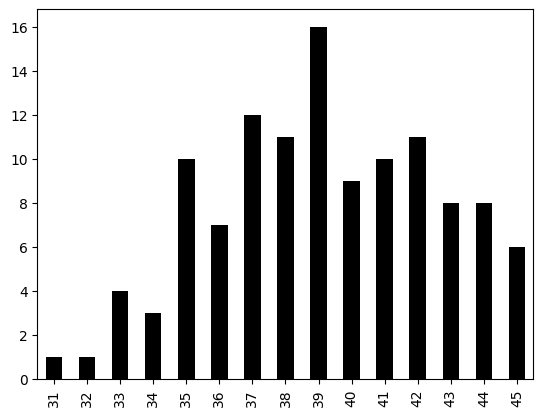

In [11]:
#T = df_long[df_long['score'] < 46]
T = df_long.query('score < 46')
M = T['score'].value_counts().sort_index()
m = T.mean()

M.plot.bar(color='black')



## Fit to normal distribution

          Nom    C  score
0     Yannick   C1     36
1    LaurentM   C1     39
2        Jody   C1     36
3       David   C1     43
4     Jacques   C1     41
..        ...  ...    ...
160      Yves  C11     35
161  Caroline  C11     39
162    Pascal  C11     35
163       Jay  C11     37
164    Daniel  C11     36

[117 rows x 3 columns]
39.17094017094017 3.336640918701338


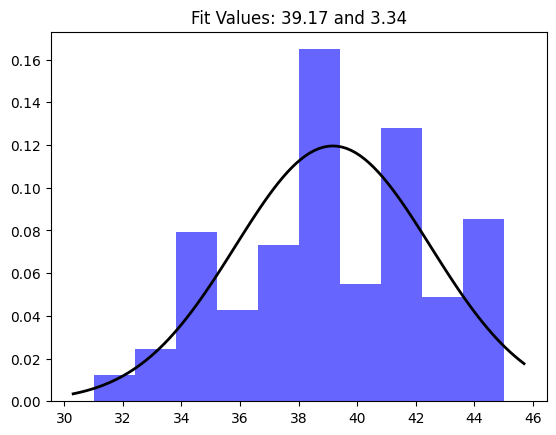

[[41.31371842]]


In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to
# the data:
# mean and standard deviation
print(T)
mu, std = norm.fit(T['score'])
print(mu,std)
# Plot the histogram.
plt.hist(T['score'], bins=10, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

R = np.random.normal(mu, std, (1,1))
print(R)

[34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]


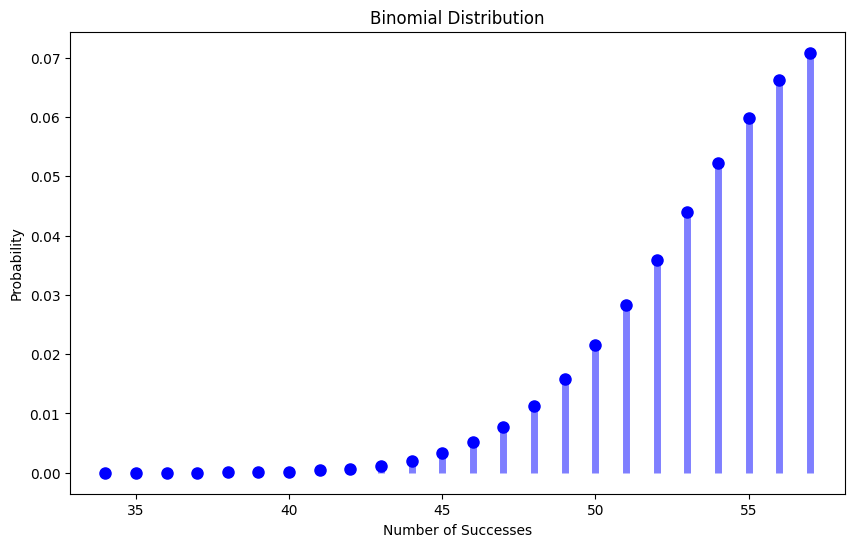

In [13]:
from scipy.stats import binom

# Fit to binomial distribution
n = len(T['score'])
p = 0.5

# Plot the PDF
x = np.arange(34, 58)
print(x)
plt.figure(figsize=(10, 6))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()


## Modèle binomial

0.24481837606837606


<BarContainer object of 24 artists>

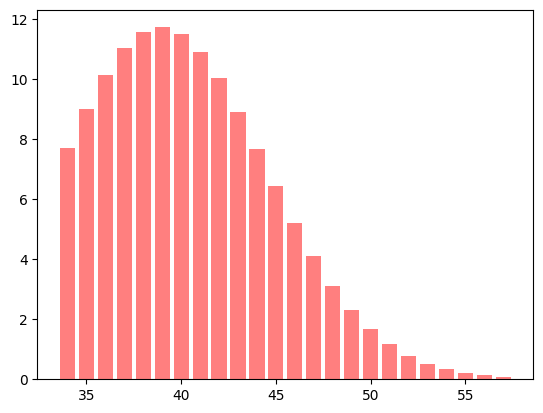

In [14]:
import matplotlib.pyplot as pl
from scipy.stats import binom

n = (len(T))
n2=160
print(m[0]/n2)

X = binom(n2, (m[0]/n2))
#X = binom(n2, 0.22)
E = [160 * X.pmf(k) for k in range(34,58)]
pl.bar(range(34,58), E, color ='red', alpha=0.5)


In [15]:

EX = df_long.query('Nom == "Yannick"').mean()  / m[0]
EY = df_long.query('Nom == "Daniel"').mean() / m[0]

print(EX, EY)

X = binom(160, (EX/160))
Y = binom(160, (EY/160))

s = 0
for i in range(24):
    s = s + X.pmf(i) * Y.pmf(i)

print(float(s))

score    0.993315
dtype: float64 score    1.127923
dtype: float64
0.2970653807106749


### Create a Density Plot of a Binomial Distribution

To create a density plot of a binomial distribution, we can use the `create_distplot` function from the `plotly` library. The `create_distplot` function takes two arguments: the number of trials (`n`) and the probability of success (`p`).

Here is an example of how to create a density plot of a binomial distribution with 100 trials and a success probability of 0.5:

```python
import plotly.figure_factory as ff

n = 100
p = 0.5

data = [np.random.binomial(n, p) for _ in range(1000)]

fig = ff.create_distplot([data], ['Binomial Distribution'], show_hist=False)
fig.show()
```

You can adjust the values of `n` and `p` to create different binomial distributions.


In [16]:
import plotly.figure_factory as ff

n = 160
p = 0.2

data = [np.random.binomial(n, p) for _ in range(1000)]

fig = ff.create_distplot([data], ['Binomial Distribution'], show_hist=True)
fig.show()